In [1]:
import pyspark

In [2]:
lines = sc.textFile("/Users/dzzxjl/Desktop/train.csv")

In [3]:
lines.first()

'PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked'

In [4]:
user_data = sc.textFile('/Users/dzzxjl/data/ml-100k/u.user')

In [5]:
user_data.first()

'1|24|M|technician|85711'

In [6]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [7]:
user_fields = user_data.map(lambda line: line.split('|'))


In [9]:
user_fields.collect()

[['1', '24', 'M', 'technician', '85711'],
 ['2', '53', 'F', 'other', '94043'],
 ['3', '23', 'M', 'writer', '32067'],
 ['4', '24', 'M', 'technician', '43537'],
 ['5', '33', 'F', 'other', '15213'],
 ['6', '42', 'M', 'executive', '98101'],
 ['7', '57', 'M', 'administrator', '91344'],
 ['8', '36', 'M', 'administrator', '05201'],
 ['9', '29', 'M', 'student', '01002'],
 ['10', '53', 'M', 'lawyer', '90703'],
 ['11', '39', 'F', 'other', '30329'],
 ['12', '28', 'F', 'other', '06405'],
 ['13', '47', 'M', 'educator', '29206'],
 ['14', '45', 'M', 'scientist', '55106'],
 ['15', '49', 'F', 'educator', '97301'],
 ['16', '21', 'M', 'entertainment', '10309'],
 ['17', '30', 'M', 'programmer', '06355'],
 ['18', '35', 'F', 'other', '37212'],
 ['19', '40', 'M', 'librarian', '02138'],
 ['20', '42', 'F', 'homemaker', '95660'],
 ['21', '26', 'M', 'writer', '30068'],
 ['22', '25', 'M', 'writer', '40206'],
 ['23', '30', 'F', 'artist', '48197'],
 ['24', '21', 'F', 'artist', '94533'],
 ['25', '39', 'M', 'engineer

In [11]:
user_fields = user_data.map(lambda line: line.split("|"))
num_users = user_fields.map(lambda fields: fields[0]).count()
num_genders = user_fields.map(lambda fields: fields[2]).distinct().count()
num_occupations = user_fields.map(lambda fields: fields[3]).distinct().count()
num_zipcodes = user_fields.map(lambda fields: fields[4]).distinct().count()
print("Users: %d, genders: %d, occupations: %d, ZIP codes: %d" % (num_users, num_genders, num_occupations, num_zipcodes))

Users: 943, genders: 2, occupations: 21, ZIP codes: 795


In [12]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


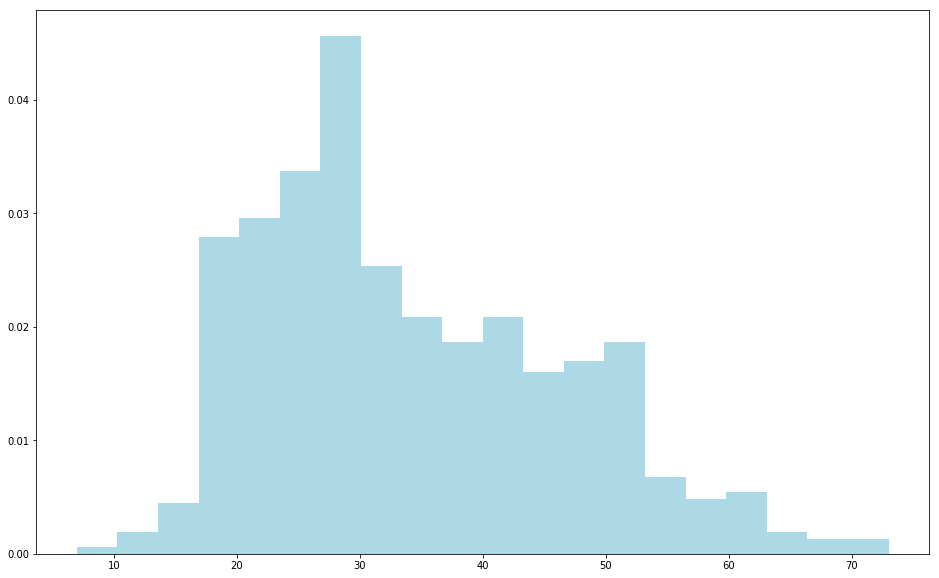

In [13]:
ages = user_fields.map(lambda x: int(x[1])).collect()
hist(ages, bins=20, color='lightblue', normed=True)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(16, 10)

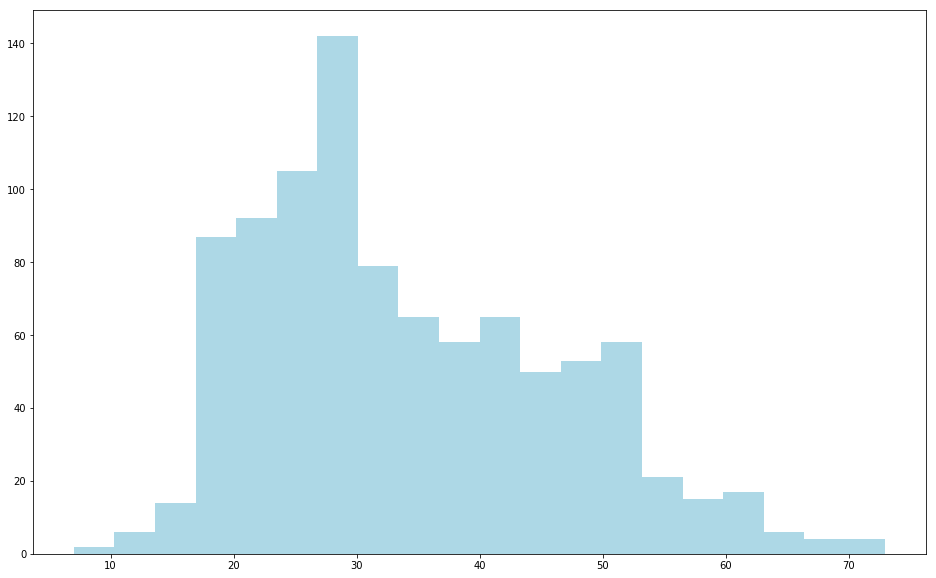

In [14]:
ages = user_fields.map(lambda x: int(x[1])).collect()
hist(ages, bins=20, color='lightblue')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(16, 10)

In [20]:
user_fields.map(lambda fields: (fields[3], 1)).collect()

[('technician', 1),
 ('other', 1),
 ('writer', 1),
 ('technician', 1),
 ('other', 1),
 ('executive', 1),
 ('administrator', 1),
 ('administrator', 1),
 ('student', 1),
 ('lawyer', 1),
 ('other', 1),
 ('other', 1),
 ('educator', 1),
 ('scientist', 1),
 ('educator', 1),
 ('entertainment', 1),
 ('programmer', 1),
 ('other', 1),
 ('librarian', 1),
 ('homemaker', 1),
 ('writer', 1),
 ('writer', 1),
 ('artist', 1),
 ('artist', 1),
 ('engineer', 1),
 ('engineer', 1),
 ('librarian', 1),
 ('writer', 1),
 ('programmer', 1),
 ('student', 1),
 ('artist', 1),
 ('student', 1),
 ('student', 1),
 ('administrator', 1),
 ('homemaker', 1),
 ('student', 1),
 ('student', 1),
 ('other', 1),
 ('entertainment', 1),
 ('scientist', 1),
 ('engineer', 1),
 ('administrator', 1),
 ('librarian', 1),
 ('technician', 1),
 ('programmer', 1),
 ('marketing', 1),
 ('marketing', 1),
 ('administrator', 1),
 ('student', 1),
 ('writer', 1),
 ('educator', 1),
 ('student', 1),
 ('programmer', 1),
 ('executive', 1),
 ('programme

In [22]:
count_by_occupation = user_fields.map(lambda fields: (fields[3],1)).reduceByKey(lambda x, y: x + y).collect()

In [23]:
count_by_occupation

[('other', 105),
 ('executive', 32),
 ('administrator', 79),
 ('student', 196),
 ('educator', 95),
 ('programmer', 66),
 ('homemaker', 7),
 ('artist', 28),
 ('engineer', 67),
 ('none', 9),
 ('retired', 14),
 ('doctor', 7),
 ('technician', 27),
 ('writer', 45),
 ('lawyer', 12),
 ('scientist', 31),
 ('entertainment', 18),
 ('librarian', 51),
 ('marketing', 26),
 ('healthcare', 16),
 ('salesman', 12)]

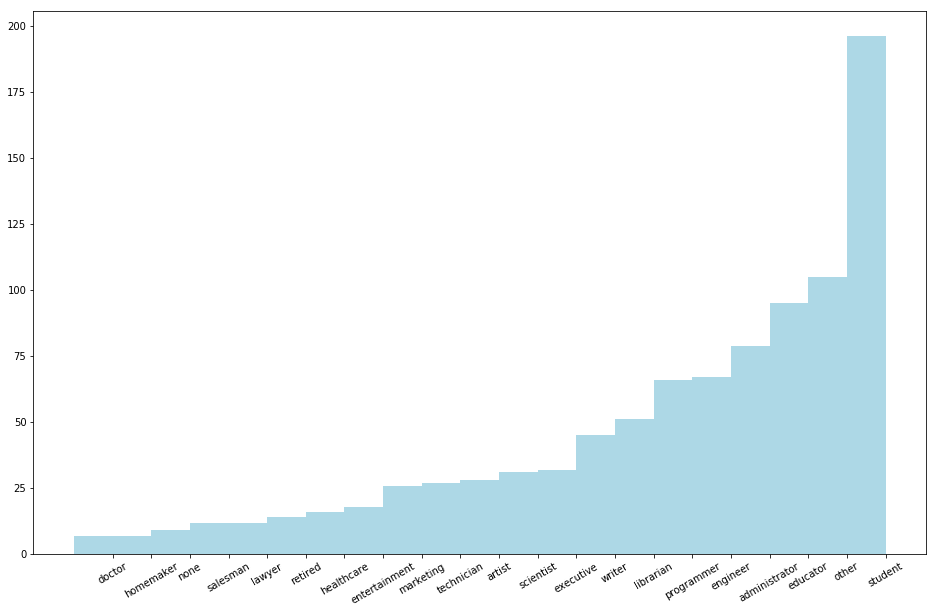

In [24]:
x_axis1 = np.array([c[0] for c in count_by_occupation])
y_axis1 = np.array([c[1] for c in count_by_occupation])
x_axis = x_axis1[np.argsort(y_axis1)]
y_axis = y_axis1[np.argsort(y_axis1)]

pos = np.arange(len(x_axis))
width = 1.0

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(x_axis)

plt.bar(pos, y_axis, width, color='lightblue')
plt.xticks(rotation=30)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(16, 10)

In [26]:
count_by_occupation2 = user_fields.map(lambda x: x[3]).countByValue()

In [27]:
count_by_occupation2

defaultdict(int,
            {'administrator': 79,
             'artist': 28,
             'doctor': 7,
             'educator': 95,
             'engineer': 67,
             'entertainment': 18,
             'executive': 32,
             'healthcare': 16,
             'homemaker': 7,
             'lawyer': 12,
             'librarian': 51,
             'marketing': 26,
             'none': 9,
             'other': 105,
             'programmer': 66,
             'retired': 14,
             'salesman': 12,
             'scientist': 31,
             'student': 196,
             'technician': 27,
             'writer': 45})